In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [65]:
X = np.array([[1,2]])
y = np.array([3])

In [66]:
y = np.where(y == 3, 0, 1)

In [67]:
class MLP(object):
    def __init__(self,l2=0.0,n_hidden=3,epochs=30,learning_rate=0.01,shuffle=True,minibatch=1,seed=None):
        self.random = np.random.RandomState(seed)
        self.l2 = l2
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.minibatch = minibatch
        self.shuffle = shuffle
        
    def _onehot(self, y, n_classes):
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T
        
    def ReLU(self, z):
        return np.maximum(z,0)
    
    def forward(self, X):
        z_h = np.dot(X, self.w_h)
        a_h = self.ReLU(z_h)
        z_out = np.dot(a_h, self.w_out)
        a_out = self.ReLU(z_out)

        return z_h, a_h, z_out, a_out
    
    def compute_cost(self, y_enc, output):
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))
        
        cost = ((y_enc - output) ** 2).sum() + L2_term
        
        return cost
    
    def predict(self, X):
        z_h, a_h, z_out, a_out = self.forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred
    
    def fit(self, X_train, y_train):
        n_output = np.unique(y_train).shape[0]
        n_features = X_train.shape[1]

        self.w_h = np.array([[2.0,1.0,1.0],[1.0,-2.0,2.0]])

        self.w_out = np.array([[-1.0],[3.0],[2.0]])

        self.eval_ = {'cost': [], 'w_h': [], 'w_out': []}

        y_train_enc = self._onehot(y_train, n_output)

        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch +
                                   1, self.minibatch):
                batch_idx = indices[start_idx:start_idx + self.minibatch]

                z_h, a_h, z_out, a_out = self.forward(X_train[batch_idx])

                sigma_out = a_out - y_train_enc[batch_idx]
                
                activation_derivative_h = a_h
                    
                sigma_h = (np.dot(sigma_out, self.w_out.T) *
                           activation_derivative_h)

                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)

                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)

                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h
                
                self.w_h -= self.learning_rate * delta_w_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out
                self.w_out -= self.learning_rate * delta_w_out
                
            z_h, a_h, z_out, a_out = self.forward(X_train)
            
            cost = self.compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)

            self.eval_['cost'].append(cost)
            self.eval_['w_h'].append(self.w_h)
            self.eval_['w_out'].append(self.w_out)

        return self

In [68]:
def plotar(eval_,epo,eta):
    print('Epochs: {} | Learning rate: {}'.format(epo,eta))
    
    cost = eval_['cost']
    w_h = eval_['w_h']
    w_out = eval_['w_out']

    epochs = range(1, epo + 1)

    plt.plot(epochs, cost, 'b', label='Training cost')
    plt.title('Cost')
    plt.legend(loc='best')
    plt.show()

    print('w_h:')
    for i,w in zip(epochs,w_h):
        print('Epoch {}: {}'.format(i,w))
        
    print('w_out:')
    for i,w in zip(epochs,w_out):
        print('Epoch {}: {}'.format(i,w))

In [69]:
def create_model_and_fit(epoch,learning_rate,X,y):
    model = MLP(epochs=epoch,learning_rate=learning_rate)
    model.fit(X,y)
    return model

### Questão 01

In [70]:
num_epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]

Epochs: 10 | Learning rate: 0.001


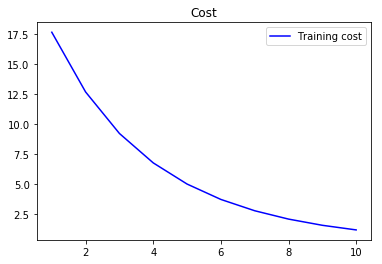

w_h:
Epoch 1: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 2: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 3: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 4: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 5: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 6: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 7: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 8: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 9: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
Epoch 10: [[ 2.12014496  1.          0.76664092]
 [ 1.24028991 -2.          1.53328185]]
w_out:
Epoch 1: [[-1.11436199]
 [ 3.        ]
 [ 1.88019007]]
Epoch 2: [[-1.11436199]
 [ 3.        ]
 [ 1.88019007

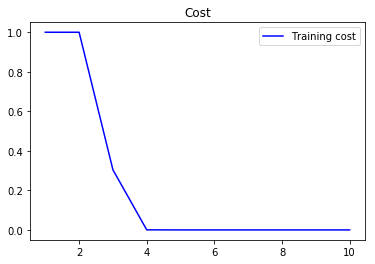

w_h:
Epoch 1: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 2: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 3: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 4: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 5: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 6: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 7: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 8: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 9: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 10: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
w_out:
Epoch 1: [[-1.07930561]
 [ 3.        ]
 [ 1.81797992]]
Epoch 2: [[-1.07930561]
 [ 3.        ]
 [ 1.81797992

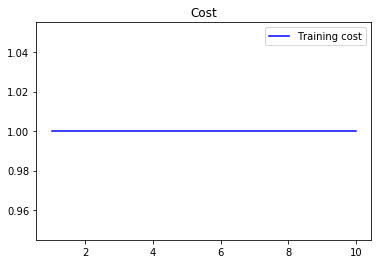

w_h:
Epoch 1: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 2: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 3: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 4: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 5: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 6: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 7: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 8: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 9: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 10: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
w_out:
Epoch 1: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 2: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 3: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 4: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 5: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 6: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 7: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 8: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 9: [[-1.6]
 [ 3. ]
 [-0.5]]
Epoch 10: [[-1.6]
 [ 3. ]
 [-0.5]]
Epochs: 50 | Learning rate: 0.001


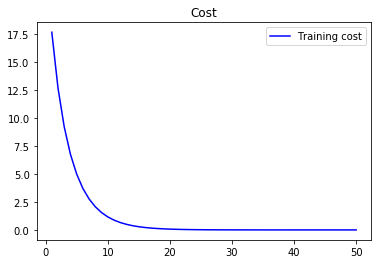

w_h:
Epoch 1: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 2: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 3: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 4: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 5: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 6: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 7: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 8: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 9: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 10: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 11: [[ 2.16409983  1.          0.70966308]
 [ 1.32819965 -2.          1.41932616]]
Epoch 12: [[ 2.16409983  

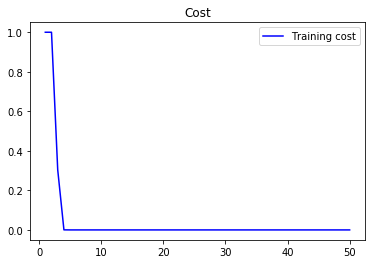

w_h:
Epoch 1: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 2: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 3: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 4: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 5: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 6: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 7: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 8: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 9: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 10: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 11: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 12: [[ 2.05979713  

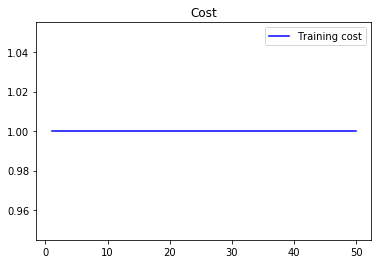

w_h:
Epoch 1: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 2: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 3: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 4: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 5: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 6: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 7: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 8: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 9: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 10: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 11: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 12: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 13: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 14: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 15: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 16: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 17: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 18: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 19: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 20: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 21: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 22: [[-0.2 

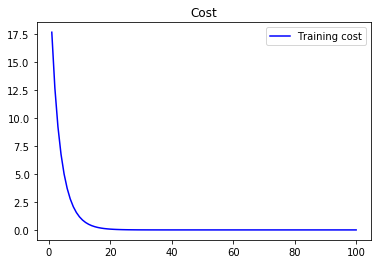

w_h:
Epoch 1: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 2: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 3: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 4: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 5: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 6: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 7: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 8: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 9: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 10: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 11: [[ 2.16428451  1.          0.7094451 ]
 [ 1.32856902 -2.          1.4188902 ]]
Epoch 12: [[ 2.16428451  

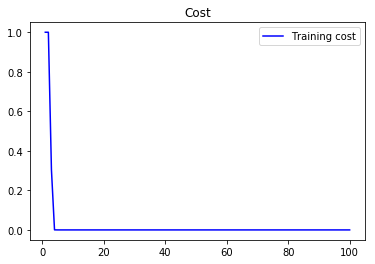

w_h:
Epoch 1: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 2: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 3: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 4: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 5: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 6: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 7: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 8: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 9: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 10: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 11: [[ 2.05979713  1.          0.62046002]
 [ 1.11959425 -2.          1.24092005]]
Epoch 12: [[ 2.05979713  

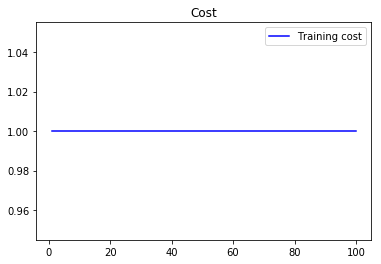

w_h:
Epoch 1: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 2: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 3: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 4: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 5: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 6: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 7: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 8: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 9: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 10: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 11: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 12: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 13: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 14: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 15: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 16: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 17: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 18: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 19: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 20: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 21: [[-0.2  1.  -4. ]
 [-3.4 -2.  -8. ]]
Epoch 22: [[-0.2 

In [71]:
for epo in num_epochs:
    for eta in learning_rate:
        model = create_model_and_fit(epo,eta,X,y)
        plotar(model.eval_,epo,eta)